In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
class PLA:
    def __init__(self, n_iters=2000):
        self.n_iters= n_iters
        self.W= None
        self.b= None
    
    def fit(self, X, y):
        m, n= X.shape                 # m-> no. of training examples     n-> no. of features
        self.W= np.zeros(n)
        #self.b= 0.0
        
        misclassifications= []
        
        for epoch in range(self.n_iters):
            misclassified=0
            for i in range(m):
                prediction= np.dot(self.W, X[i])  #+self.b
                
                if (y[i]==1 and prediction<0):
                    self.W+=(X[i])
                    #self.b+=1
                    misclassified+=1
                elif(y[i]==0 and prediction>=0):
                    self.W-=(X[i])
                    #self.b-=1
                    misclassified+=1
            
            if(misclassified==0):
                print(f'The process converged in {epoch} steps')
                break
            
            else:
                misclassifications.append([misclassified, epoch])
                
        return misclassifications
                
    def predict(self, X):
        y_pred=np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            activation= np.dot(self.W, X[i])#+self.b
            if(activation>= 0):
                y_pred[i]= 1
            elif(activation < 0):
                y_pred[i]=0
        return (y_pred)
        

In [29]:
#the confusion matrix function -> computes the confusion matrix, recall value, precision value and f1 score 
def confusion_matrix_fun(y, y_pred):
    confusion_matrix= np.zeros([2,2])
    for i in range(len(y)):
        if(y[i]==1 and y_pred[i]==1):
            confusion_matrix[0,0]+=1
        elif(y[i]==0 and y_pred[i]==1):
            confusion_matrix[0,1]+=1
        elif(y[i]==1 and y_pred[i]==0):
            confusion_matrix[1,0]+=1
        else:
            confusion_matrix[1,1]+=1
        
        recall= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))
        precision= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0]))
        f1_score= (2*precision*recall)/(precision+recall)

            
        
    return confusion_matrix, recall, precision, f1_score

In [30]:
#the accuracy function -> percentage of datapoints accurately predicted
def accuracy(y, y_pred):
    count=0
    m=len(y_pred)
    for i in range(y.shape[0]):
        count+=(y_pred[i]==y[i])
        
    return (float(count/m))
        

In [31]:
#splitting the data into training and cross validation sets

def Splitter( X, test_size= 0.2, random_state= 42):
    np.random.seed(random_state)
    shuffled_indices= np.random.permutation(len(X))
    test_set_size= int(test_size* len(X))
    test_indices= shuffled_indices[:test_set_size]
    train_indices= shuffled_indices[test_set_size:]
        
    return train_indices, test_indices

In [32]:
data= np.load('inputs_Dataset-1.npy')
data.shape

(1000, 11)

In [33]:
labels= np.load('outputs_Dataset-1.npy')

In [34]:
from sklearn.model_selection import KFold

k=10
kf= KFold(n_splits=k, shuffle=True, random_state=55)
model= PLA()

acc_scores=[]
f1_scores=[]
precision_values=[]
recall_scores=[]

for train_index, test_index in kf.split(data):
    X_train, X_test= data[train_index], data[test_index]
    y_train, y_test= labels[train_index], labels[test_index]
    
    model.fit(X_train, y_train)
    y_pred= model.predict(X_test)
    
    acc_scores.append(accuracy(y_test, y_pred))
    _, recall, precision, f1_score= confusion_matrix_fun(y_test, y_pred)
    f1_scores.append(f1_score)
    precision_values.append(precision)
    recall_scores.append(recall)
    
    
print(f'The mean of accuracy over {k} folds is: {np.mean(acc_scores)}')
print(f'The variance of accuracy over {k} folds is: {np.var(acc_scores)}')
print(f'The mean of F1_scores over {k} folds is: {np.mean(f1_scores)}')
print(f'The variance of F1_scores over {k} folds is: {np.var(f1_scores)}')
print(f'The mean of precision values over {k} folds is: {np.mean(precision_values)}')
print(f'The variance of precision values over {k} folds is: {np.var(precision_values)}')
print(f'The mean of recall values over {k} folds is: {np.mean(recall_scores)}')
print(f'The variance of recall values over {k} folds is: {np.var(recall_scores)}')

The process converged in 562 steps
The process converged in 730 steps
The process converged in 249 steps


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0]))


The process converged in 792 steps


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:14: RuntimeWarning: invalid value encountered in scalar divide
  recall= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))


The process converged in 809 steps
The process converged in 278 steps
The process converged in 594 steps
The process converged in 512 steps
The process converged in 216 steps
The process converged in 948 steps
The mean of accuracy over 10 folds is: 0.99
The variance of accuracy over 10 folds is: 0.00016000000000000028
The mean of F1_scores over 10 folds is: 0.9892942365275023
The variance of F1_scores over 10 folds is: 0.0001914219701946707
The mean of precision values over 10 folds is: 0.9914937611408201
The variance of precision values over 10 folds is: 0.00021270222196802867
The mean of recall values over 10 folds is: 0.9873306555675214
The variance of recall values over 10 folds is: 0.00037944192499898393


In [35]:
# dividing the dataset into 80:20

train_indices, test_indices= Splitter(data)
X_train, X_test= data[train_indices], data[test_indices]
y_train, y_test= labels[train_indices], labels[test_indices]

misclassifications= model.fit(X_train, y_train)
misclassifications= pd.DataFrame(misclassifications, columns=["misclassified_instances", "n_steps"])

y_pred= model.predict(X_test)
y_pred_train= model.predict(X_train)
_, recall, precision, f1_score= confusion_matrix_fun(y_test, y_pred)
_, recall_train, precision_train, f1_score_train= confusion_matrix_fun(y_train, y_pred_train)

acc_train= accuracy(y_train, y_pred_train)
acc= accuracy(y_test, y_pred)

print(f'The value of recall is: {recall}')
print(f'The value of precision is : {precision}')
print(f'The f1_score of prediction is: {f1_score}')
print(f'The accuraacy on test set is: {acc}')
print("#######################################################")
print(f'The value of recall is: {recall_train}')
print(f'The value of precision is : {precision_train}')
print(f'The f1_score of prediction is: {f1_score_train}')
print(f'The accuraacy on train set is: {acc_train}')

The process converged in 555 steps
The value of recall is: 0.9895833333333334
The value of precision is : 1.0
The f1_score of prediction is: 0.9947643979057591
The accuraacy on test set is: 0.995
#######################################################
The value of recall is: 1.0
The value of precision is : 1.0
The f1_score of prediction is: 1.0
The accuraacy on train set is: 1.0


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:14: RuntimeWarning: invalid value encountered in scalar divide
  recall= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0]))


In [10]:
misclassifications

,misclassified_instances,n_steps
0,67,0
1,45,1
2,39,2
3,41,3
4,37,4
...,...,...
550,9,550
551,8,551
552,5,552
553,9,553


<Axes: xlabel='n_steps'>

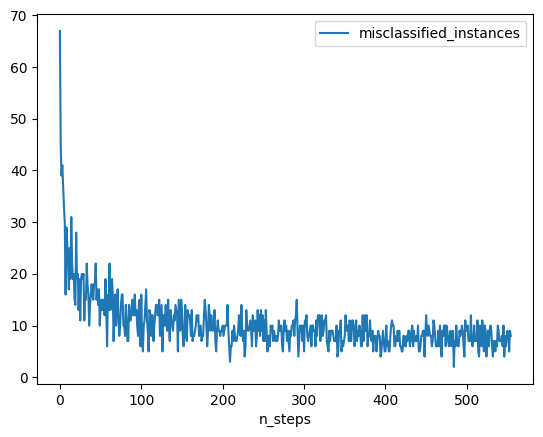

In [11]:
misclassifications.plot(x="n_steps", y="misclassified_instances", kind= "line")

In [37]:
#loading Dataset 2
data2= np.load('inputs_Dataset-2.npy')
labels2= np.load('outputs_Dataset-2.npy')

In [38]:
train_indices2, test_indices2= Splitter(data2)
X_train2, X_test2= data2[train_indices2], data2[test_indices2]
y_train2, y_test2= labels2[train_indices2], labels2[test_indices2]

<Axes: xlabel='n_steps'>

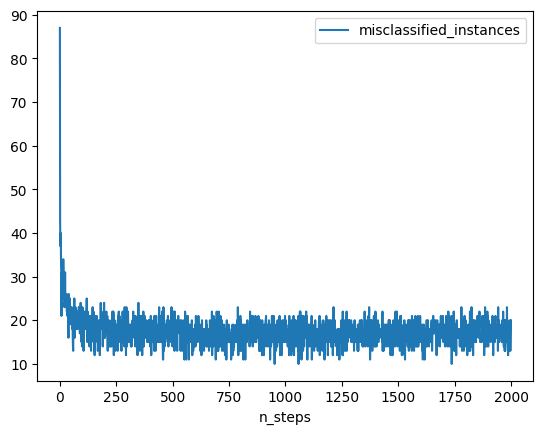

In [39]:
model2= PLA()
misclassifications2= model2.fit(X_train2, y_train2)
misclassifications2= pd.DataFrame(misclassifications2, columns=["misclassified_instances", "n_steps"])

misclassifications2.plot(x="n_steps", y="misclassified_instances")

In [42]:
y_pred2= model2.predict(X_test2)
acc2= accuracy(y_test2, y_pred2)
_, recall2, precision2, f1_score2= confusion_matrix_fun(y_test2, y_pred2)

y_train_pred2= model2.predict(X_train2)
acc_train2= accuracy(y_train2, y_train_pred2)
_,recall_train2, precision_train2, f1_score_train2= confusion_matrix_fun(y_train2, y_train_pred2)

print(f'The accuracy on test set is: {acc2}')
print(f'The f1_score of prediction on test set is: {f1_score2}')
print(f'The precision on test set is: {precision2}')
print(f'The recall on test set is: {recall2}')
print("##################################################################")
print(f'The accuracy on training set is: {acc_train2}')
print(f'The f1_score of prediction on training set is: {f1_score_train2}')
print(f'The precision on training set is: {precision_train2}')
print(f'The recall on training set is: {recall_train2}')

The accuracy on test set is: 0.985
The f1_score of prediction on test set is: 0.9841269841269841
The precision on test set is: 0.96875
The recall on test set is: 1.0
##################################################################
The accuracy on training set is: 0.98875
The f1_score of prediction on training set is: 0.9884169884169884
The precision on training set is: 0.9846153846153847
The recall on training set is: 0.9922480620155039


/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:14: RuntimeWarning: invalid value encountered in scalar divide
  recall= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1]))
/var/folders/rz/4wkyghgs70q02_v9zvprnnhw0000gn/T/ipykernel_685/1691398175.py:15: RuntimeWarning: invalid value encountered in scalar divide
  precision= (confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0]))


If the number of misclassified examples of a dataset remains constant over a large number of iterations of the perceptron learning algorithm but the algorithm doesn't converge, it suggests that the dataset might be linearly inseparable. In other words, the data points cannot be separated into distinct classes using a single hyperplane.

The perceptron learning algorithm is designed to converge and find a separating hyperplane if the data is linearly separable. If the algorithm doesn't converge and the number of misclassified examples remains constant, it's likely that the algorithm keeps oscillating between different weight updates without converging to a final solution. This can happen when the data points are not neatly separable by a linear boundary.

If your data is not linearly separable, the perceptron algorithm might not be the most suitable choice for classification. In such cases, you might consider using more advanced algorithms that can handle non-linear relationships between features and classes, such as support vector machines (SVMs) or neural networks.

To summarize, if the perceptron learning algorithm doesn't converge and the number of misclassified examples remains constant, it suggests that the data might be linearly inseparable, and you should explore more sophisticated algorithms to handle the classification task.

In [16]:
#loading dataset3
data3= np.load('inputs_Dataset-3.npy')
labels3= np.load('outputs_Dataset-3.npy')

In [18]:
model3= PLA()

The value of recall is: 0.4222222222222222
The value of precision is : 0.3877551020408163
The f1_score of prediction is: 0.40425531914893614
The accuraacy on test set is: 0.44
#################################################
The value of recall on train set: 0.582089552238806
The value of precision on train set : 0.5480093676814989
The f1_score of prediction on train set: 0.5645355850422196
The accuraacy on train set is: 0.54875


<Axes: xlabel='n_steps'>

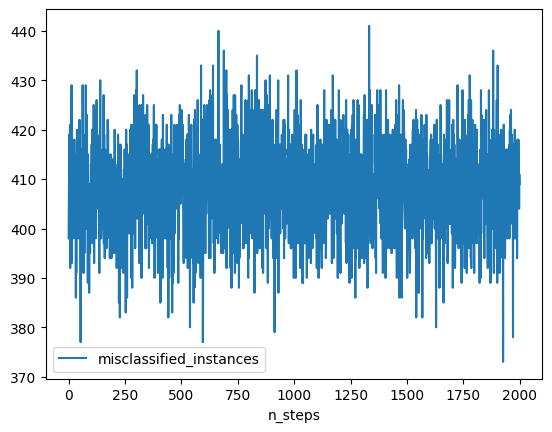

In [46]:
# dividing the dataset into 80:20

train_indices3, test_indices3= Splitter(data3)
X_train3, X_test3= data3[train_indices3], data3[test_indices3]
y_train3, y_test3= labels3[train_indices3], labels3[test_indices3]

misclassifications3= model3.fit(X_train3, y_train3)
misclassifications3= pd.DataFrame(misclassifications3, columns=["misclassified_instances", "n_steps"])

y_pred3= model.predict(X_test3)
_, recall3, precision3, f1_score3= confusion_matrix_fun(y_test3, y_pred3)

acc3= accuracy(y_test3, y_pred3)

y_train_pred3= model.predict(X_train3)
_,recall_train3, precision_train3, f1_score_train3= confusion_matrix_fun(y_train3, y_train_pred3)
acc_train3= accuracy(y_train3, y_train_pred3)

print(f'The value of recall is: {recall3}')
print(f'The value of precision is : {precision3}')
print(f'The f1_score of prediction is: {f1_score3}')
print(f'The accuraacy on test set is: {acc3}')

print("#################################################")

print(f'The value of recall on train set: {recall_train3}')
print(f'The value of precision on train set : {precision_train3}')
print(f'The f1_score of prediction on train set: {f1_score_train3}')
print(f'The accuraacy on train set is: {acc_train3}')

misclassifications3.plot(x="n_steps", y="misclassified_instances", kind= "line")

In [21]:
print(misclassifications3)

      misclassified_instances  n_steps
0                         398        0
1                         406        1
2                         414        2
3                         419        3
4                         401        4
...                       ...      ...
1995                      413     1995
1996                      414     1996
1997                      404     1997
1998                      411     1998
1999                      409     1999

[2000 rows x 2 columns]
